## Project2
## Voiced, Unvoiced and Silence detection on TIMIT dataset

#### Speech Signal Processing 
#### 작성자 : Inkoo Jeon

In [1]:
from glob import glob
from random import shuffle
import librosa
from librosa.feature import mfcc
# from scipy.io import wavfile
import numpy as np
import sys
import argparse

###############################################################################
# Data related functions

def get_data_pair(folder_list,key="sa"): # data path list

    # person_list -> (.wav path, .phn path)
    result=[]
    for fl in folder_list:
        key_list=glob(folder_list[0]+key+"*.wav")
        for k in key_list:
            result.append((k,k.replace(".wav",".phn")))

    return result

def phn_read(Data_list): # phn file parser
    # (.wav path, .phn path) -> {"GT","PH"}
    # "GT" : (event_start, event_end)
    # "PH" : phonem name
    result=[]
    for (wav,phn)in Data_list:
        f=open(phn,"r")
        lines=f.readlines()
        EVENT=[]
        for l in lines:
            event={}
            tmp=l.split(" ")
            event["GT"]=(int(tmp[0]), int(tmp[1]))
            event["PH"]=tmp[-1].split('\n')[0]
            EVENT.append(event)
        result.append(EVENT)
    return result

def phn_display(phn_data,event_set):
    wav_len=phn_data[-1]["GT"][-1]
    result=np.zeros(wav_len)
    for data in phn_data:
        if data["PH"] in event_set:
            result[data["GT"][0]:data["GT"][1]]=1
    return result
###############################################################################

parser=argparse.ArgumentParser()
parser.add_argument('--timit_root', default='../timit_wav/',type=str)
args=parser.parse_args(args=[])
timit_root=args.timit_root
if timit_root[-1] !='/':
    timit_root=timit_root+'/'

Fs=16000
Ns=int(0.01*Fs)
Nf=int(0.02*Fs)
###############################################################################
# Data split train/validation

p_val=0.2

print(f"TIMIT dataset root : {timit_root}")
Data_tr=[]
Data_val=[]
for idx in range(1,9):
    folder_person=f"{timit_root}train/dr{idx}/*/"
    person_list=glob(folder_person)
#     shuffle(person_list)
    L_tot=len(person_list)
    Data_val=Data_val+person_list[:int(L_tot*p_val)]
    Data_tr=Data_tr+person_list[int(L_tot*p_val):]
    
    
sa_tr=get_data_pair(Data_tr,"sa")
sa_val=get_data_pair(Data_val,"sa")
phn_tr=phn_read(sa_tr)
phn_val=phn_read(sa_val)

print("\n Data pair ---------------------\n")
print(sa_tr[:6])
print("\n PHN file format ---------------------\n")
print(f'{phn_tr[0][:10]} ...')

###############################################################################


TIMIT dataset root : ../timit_wav/

 Data pair ---------------------

[('../timit_wav/train/dr1\\fmem0\\sa1.wav', '../timit_wav/train/dr1\\fmem0\\sa1.phn'), ('../timit_wav/train/dr1\\fmem0\\sa2.wav', '../timit_wav/train/dr1\\fmem0\\sa2.phn'), ('../timit_wav/train/dr1\\fmem0\\sa1.wav', '../timit_wav/train/dr1\\fmem0\\sa1.phn'), ('../timit_wav/train/dr1\\fmem0\\sa2.wav', '../timit_wav/train/dr1\\fmem0\\sa2.phn'), ('../timit_wav/train/dr1\\fmem0\\sa1.wav', '../timit_wav/train/dr1\\fmem0\\sa1.phn'), ('../timit_wav/train/dr1\\fmem0\\sa2.wav', '../timit_wav/train/dr1\\fmem0\\sa2.phn')]

 PHN file format ---------------------

[{'GT': (0, 2360), 'PH': 'h#'}, {'GT': (2360, 5263), 'PH': 'sh'}, {'GT': (5263, 7021), 'PH': 'iy'}, {'GT': (7021, 8370), 'PH': 'hv'}, {'GT': (8370, 10234), 'PH': 'eh'}, {'GT': (10234, 11084), 'PH': 'dcl'}, {'GT': (11084, 11462), 'PH': 'd'}, {'GT': (11462, 11989), 'PH': 'y'}, {'GT': (11989, 12699), 'PH': 'uh'}, {'GT': (12699, 13640), 'PH': 'r'}] ...


In [2]:
###################################################################################

# ARPAbet, TIMIT에서 표현되는 발음 기호

arpabet={'aa','ae','ah','ao','aw','ax','axr','ay','eh','er','ey','ih','ix','iy','ow','oy','uh','uw','ux', # vowels
       'b','ch','d','dh','dx','el','em','en','f','g','hh','jh','k','l','m','n','ng','nx','p','q','r','s','sh','t','th','v', # consonants
       'w','wh','y','z','zh','ax-h','eng','hv','bcl','dcl','gcl','kcl','pcl','tcl','pau','epi','h#'}

unvoiced={'s','sh','f','th','ch','k','p','t','hh','tcl','kcl','pcl'}

silence={'h#','epi','pau','ax-h'}

voiced=(arpabet-unvoiced)-silence
print("\nARPAbet set:\n")
print(arpabet)
print("\nvoiced set:\n")
print(voiced)
print("\nunvoiced set:\n")
print(unvoiced)
print("\nsilence set:\n")
print(silence)


ARPAbet set:

{'b', 's', 'ng', 'ey', 'g', 'w', 'ae', 'zh', 'uh', 'uw', 'f', 'tcl', 'q', 'ih', 'dh', 'ux', 'jh', 'aa', 'ao', 'l', 'ax-h', 'ax', 'h#', 'wh', 'd', 'ch', 'th', 'hv', 'bcl', 'hh', 'p', 'pau', 'm', 'sh', 'axr', 'r', 'en', 'eng', 'n', 'gcl', 'kcl', 'eh', 'v', 'oy', 'er', 'ix', 'k', 'nx', 'y', 'ay', 'epi', 'ah', 'aw', 'iy', 'dx', 'em', 'z', 'dcl', 'ow', 't', 'pcl', 'el'}

voiced set:

{'b', 'el', 'ng', 'g', 'w', 'ae', 'zh', 'ow', 'uh', 'uw', 'q', 'ih', 'dh', 'ux', 'jh', 'aa', 'ao', 'l', 'ax', 'wh', 'd', 'hv', 'bcl', 'm', 'axr', 'r', 'en', 'eng', 'n', 'gcl', 'eh', 'v', 'oy', 'er', 'ix', 'y', 'ay', 'ah', 'aw', 'iy', 'dx', 'em', 'z', 'dcl', 'ey', 'nx'}

unvoiced set:

{'s', 'th', 'p', 'hh', 'sh', 'k', 'pcl', 'f', 't', 'tcl', 'kcl', 'ch'}

silence set:

{'epi', 'ax-h', 'h#', 'pau'}


In [3]:
import matplotlib.pyplot as plt
###############################################################################
# Frequency bin related functions

def EPD_ext(wav_path,Fs):
    x,Fs=librosa.load(wav_path,sr=Fs)
    x_tmp=np.abs(x[:len(x)//Ns*Ns])**2
    EPD_th=1e-5 # 적당한 값을 EPD threshold로 사용한다.
    result=(x_tmp>EPD_th)+0
    return result,x, x_tmp
    
def mean_filtering(Dec,M): # smoothing을 위한 mean filtering
    smth=np.ones(M)/M
    result=np.convolve(Dec,smth,"same")
    return result


---
### EPD based silence / voiced, unvoiced classification

#### EPD로 silence와 그외의 class로 1차 구분한다.

Class Division: 

Event		 : 1/0 (VAD sense ON / OFF)
Voiced		 : 0.8/0 (VAD sense ON / OFF)
Unvoiced	 : 0.6/0 (VAD sense ON / OFF)
Silence		 : 0.4/0 (VAD sense ON / OFF)


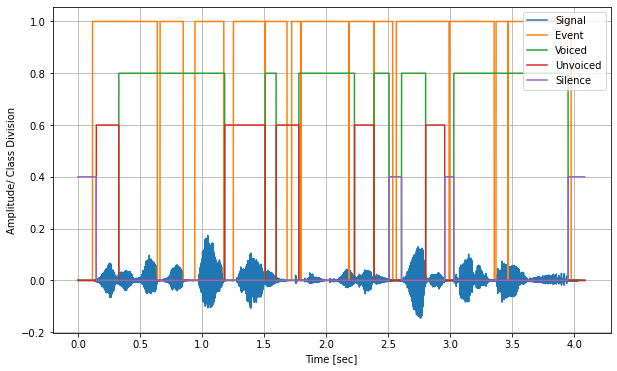

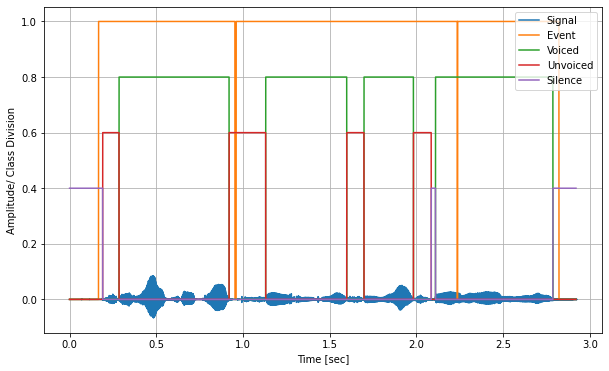

In [4]:
##################################################################################################################
# EPD로 에너지가 작은 부분을 silence, 에너지가 큰 부분을 voiced, unvoiced로 구분

def EPD_based_division(sa_set,phn_set,flag_plot):
    event_bin=[]
    for data_idx in range(len(sa_set)):
        Dec,x,Ex=EPD_ext(sa_set[data_idx][0],Fs) # EPD를 수행하고,

        Dec=mean_filtering(Dec,Nf//4) # mean filtering으로 에너지가 어느정도 큰 위치를 잡는다.
        ZCR=(np.abs(x[:len(Dec)])<5e-6)+0      # Zero crossing rate로, 추가적인 보정을 한다.
        COMB=((Dec*(1-ZCR)) > 0)+0 # zero-crossing하지 않으면서, EPD로 찾은 부분을 음성이 있는 위치라 추정한다.
        V=phn_display(phn_set[data_idx],voiced)
        U=phn_display(phn_set[data_idx],unvoiced)
        S=phn_display(phn_set[data_idx],silence)
        delta_COMB=COMB[1:]-COMB[:-1] # 0/1 신호의 경계점을 얻는다.
        e_s=((delta_COMB>0)+0).nonzero()[0] # 0 -> 1로 증가하는 지점이 event의 시작점
        e_e=((delta_COMB<0)+0).nonzero()[0] # 1 -> 0으로 감소하는 지점이 event의 끝점이 된다.
        
        event_time_line=np.zeros(len(Dec))
        for idx in range(min(len(e_s),len(e_e))): # 기대하는 음성의 길이 3*Nf (처음, 중간, 끝)보다 작으면, padding한다.
            if e_e[idx]-e_s[idx]<Nf*3:
                e_s[idx]=e_s[idx]-int(Nf*1.5)
                if e_s[idx]<0:
                    e_s[idx]=0
                e_e[idx]=e_e[idx]+int(Nf*1.5)
                if e_e[idx]>len(event_time_line)-1:
                    e_e[idx]=len(event_time_line)-1
            event_time_line[e_s[idx]:e_e[idx]]=1
        
        if len(e_s)!=len(e_e):
            print("[warn] Expected # of event might be different") # 시작점과 끝점의 갯수가 다르면 경고를 띄운다.

        if data_idx <1 and flag_plot is True: # Display results
            plt.figure(figsize=[10,6])
            plt.plot(np.arange(len(x))/Fs,x)
            plt.plot(np.arange(len(Dec))/Fs,event_time_line)
            plt.plot(np.arange(len(V))/Fs,V*0.8)
            plt.plot(np.arange(len(U))/Fs,U*0.6)
            plt.plot(np.arange(len(S))/Fs,S*0.4)
            plt.xlabel("Time [sec]")
            plt.ylabel("Amplitude/ Class Division")
            plt.legend(["Signal","Event","Voiced","Unvoiced","Silence"],loc=1)
            plt.grid("on")
            plt.show()
    
        event_bin.append((e_s,e_e))
    return event_bin


##################################################################################################################

print("Class Division: \n")
print("Event\t\t : 1/0 (VAD sense ON / OFF)")
print("Voiced\t\t : 0.8/0 (VAD sense ON / OFF)")
print("Unvoiced\t : 0.6/0 (VAD sense ON / OFF)")
print("Silence\t\t : 0.4/0 (VAD sense ON / OFF)")


Event_bin_tr=EPD_based_division(sa_tr,phn_tr,True)
Event_bin_val=EPD_based_division(sa_val,phn_val,True)


### Auto correlation을 이용해서, 유성음과 무성음을 찾아낸다.

#### Voiced signal 은 성대를 울려서 소리를 내기 때문에  tonal signal이고,  자기 상관성이 큰 특성이 있다.
#### 반면, Unvoiced signal은 마찰음, 파열음과 같이 노이즈와 유사하기 떄문에 자기 상관성이 작은 특성이 있다.
#### Auto correlation ($k\neq 0$)은 앞서 언급한 자기 상관성을 나타내는 좋은 지표이다.
##### Auto correlation : $r(k)=\mathbf{E}[x[t]\times x[t-k]]$
#### 따라서 $r(1)/r(0) > 0.5$ 이면 Voiced, $r(1)/r(0) < 0.5$ 이면 Unvoiced라고 heuristic하게 구분할 수 있다.

Class Division: 

Event		 : -0.3/0/0.3 (Unvoiced / Silence / Voiced)
Voiced		 : 0.8/0 (VAD sense ON / OFF)
Unvoiced	 : 0.6/0 (VAD sense ON / OFF)
Silence		 : 0.4/0 (VAD sense ON / OFF)


TRAINING DATA PERFORMANCE [accuracy]
Voiced : 87.38%,	Unvoiced : 88.74%,	Silence : 91.17%


VALIDATION DATA PERFORMANCE [accuracy]
Voiced : 90.34%,	Unvoiced : 91.08%,	Silence : 96.42%


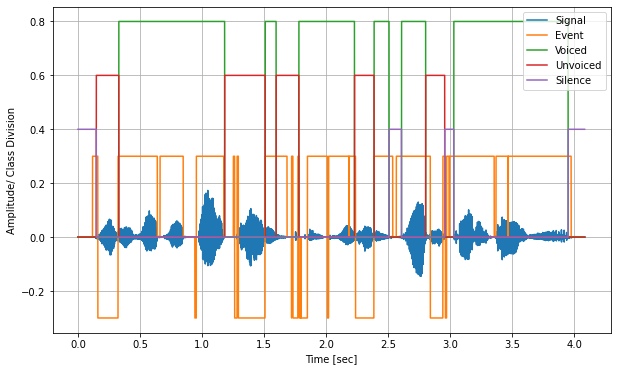

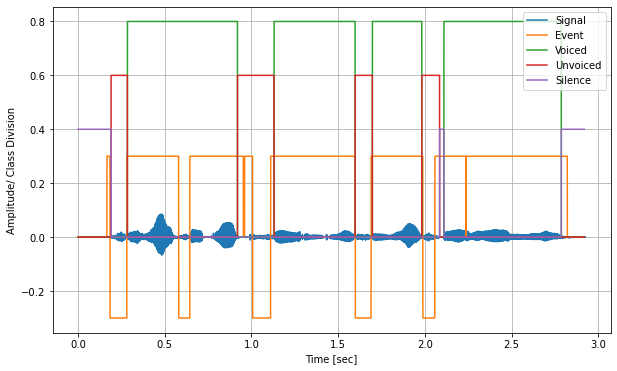

In [7]:
##################################################################################################################

# Voiced/Unvoiced divider function ( using Auto correlation )

def AUTO_COR_BASED_DIVISION(sa_set,phn_set,event_set):
    def auto_corr(x,th=0.5):
        Nx=len(x)
        result=np.zeros(Nx)
        for idx in range(Nx//Ns): # Ns 단위로 auto correlation의 값을 추정
            x_i=x[idx*Ns:(idx+1)*Ns]
            r0=np.mean(x_i*x_i)
            r1=np.mean(x_i[1:]*x_i[:-1])
            result[idx*Ns:(idx+1)*Ns]=(r1/r0)>th +0
        x_i=x[idx*Ns:]
        r0=np.mean(x_i*x_i)
        r1=np.mean(x_i[1:]*x_i[:-1])
        result[idx*Ns:]=(r1/r0)>th +0 
        return (result >= 0.5)+0 - (result < 0.5)+0 # voiced면 1 아니면 -1

    acc_V=0
    den_V=0
    acc_U=0
    den_U=0
    acc_S=0
    den_S=0
    
    for data_idx,event in enumerate(event_set):
        event_s=event[0]
        event_e=event[1]
        x,_=librosa.load(sa_set[data_idx][0],Fs) # audio를 읽기
        V=phn_display(phn_set[data_idx],voiced) +0  # Voiced가 발생한 시간 label
        U=phn_display(phn_set[data_idx],unvoiced) +0# Unvoiced가 발생한 시간 label
        S=phn_display(phn_set[data_idx],silence) +0 # Silence가 발생한 시간 label
        result=np.zeros(len(V))
        for idx in range(len(event_s)):
            result[event_s[idx]:event_e[idx]]=auto_corr(x[event_s[idx]:event_e[idx]])
        if data_idx <1:
            plt.figure(figsize=[10,6])
            plt.plot(np.arange(len(x))/Fs,x)
            plt.plot(np.arange(len(V))/Fs,result*0.3) # -0.3 / 0 / 0.3 (Unvoiced / Silence / Voiced)
            plt.plot(np.arange(len(V))/Fs,V*0.8)      # 0.8/ 0 (Voiced ON / OFF)
            plt.plot(np.arange(len(U))/Fs,U*0.6)      # 0.6/ 0 (Unvoiced ON / OFF)
            plt.plot(np.arange(len(S))/Fs,S*0.4)      # 0.4/ 0 (Silence ON / OFF)
            plt.grid("on")
            plt.xlabel("Time [sec]")
            plt.ylabel("Amplitude/ Class Division")

            plt.legend(["Signal","Event","Voiced","Unvoiced","Silence"],loc=1)

        est_V=(result>0)+0
        est_U=(result<0)+0
        est_S=(result==0)+0
        
        acc_V=acc_V+int(np.sum(V==est_V))
        den_V=den_V+len(result)
        acc_U=acc_U+int(np.sum(U==est_U))
        den_U=den_U+len(result)
        acc_S=acc_S+int(np.sum(S==est_S))
        den_S=den_S+len(result)

    # Accuracy로 각각의 이벤트의 추정 성능 출력
    acc_V=acc_V/den_V 
    acc_U=acc_U/den_U
    acc_S=acc_S/den_S
    
    return acc_V, acc_U, acc_S

##################################################################################################################


print("Class Division: \n")
print("Event\t\t : -0.3/0/0.3 (Unvoiced / Silence / Voiced)")
print("Voiced\t\t : 0.8/0 (VAD sense ON / OFF)")
print("Unvoiced\t : 0.6/0 (VAD sense ON / OFF)")
print("Silence\t\t : 0.4/0 (VAD sense ON / OFF)")
V_tr,U_tr,S_tr=AUTO_COR_BASED_DIVISION(sa_tr,phn_tr,Event_bin_tr)
print("\n============================================\n")
print("TRAINING DATA PERFORMANCE [accuracy]")
print('Voiced : {:.2f}%,\tUnvoiced : {:.2f}%,\tSilence : {:.2f}%'.format(V_tr*100,U_tr*100,S_tr*100))
print("\n============================================\n")

V_val,U_val,S_val=AUTO_COR_BASED_DIVISION(sa_val,phn_val,Event_bin_val)      
print("VALIDATION DATA PERFORMANCE [accuracy]")
print('Voiced : {:.2f}%,\tUnvoiced : {:.2f}%,\tSilence : {:.2f}%'.format(V_val*100,U_val*100,S_val*100))



 sa data ============================================

TEST DATA PERFORMANCE [accuracy]
Voiced : 90.57%,	Unvoiced : 92.87%,	Silence : 94.53%

 sx data ============================================

TEST DATA PERFORMANCE [accuracy]
Voiced : 87.45%,	Unvoiced : 86.23%,	Silence : 95.55%


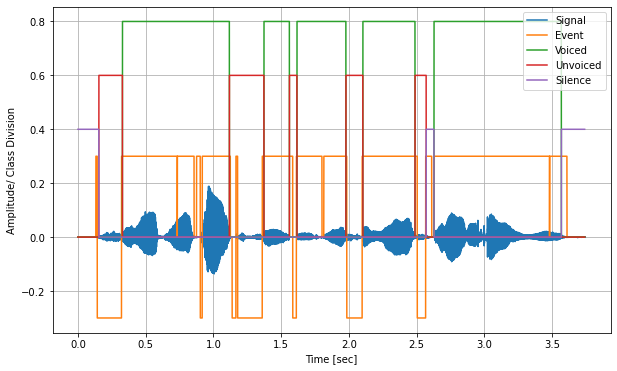

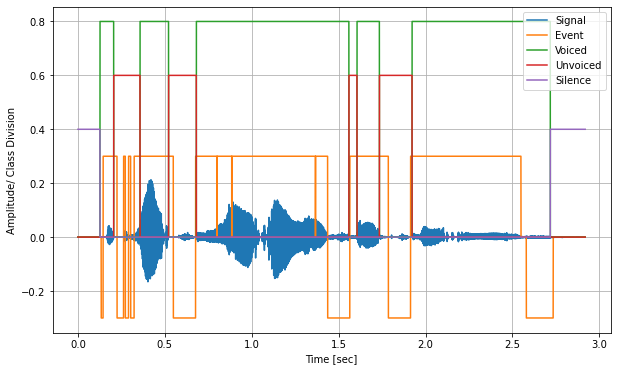

In [8]:
##################################################################################################################

# Evaluation using TEST DATASET

Data_test=[]
for idx in range(1,9):
    folder_person=f"{timit_root}test/dr{idx}/*/"
    person_list=glob(folder_person)
    shuffle(person_list)
    L_tot=len(person_list)
    Data_test=Data_test+person_list
    
sa_test=get_data_pair(Data_test,"sa") # sa data
phn_test=phn_read(sa_test)

Event_bin_test=EPD_based_division(sa_test,phn_test,0)

V_test,U_test,S_test=AUTO_COR_BASED_DIVISION(sa_test,phn_test,Event_bin_test)

print("\n sa data ============================================\n")
print("TEST DATA PERFORMANCE [accuracy]")
print('Voiced : {:.2f}%,\tUnvoiced : {:.2f}%,\tSilence : {:.2f}%'.format(V_test*100,U_test*100,S_test*100))


sx_test=get_data_pair(Data_test,"sx") # sx data
phn_test=phn_read(sx_test)

Event_bin_test=EPD_based_division(sx_test,phn_test,0)

V_test,U_test,S_test=AUTO_COR_BASED_DIVISION(sx_test,phn_test,Event_bin_test)
print("\n sx data ============================================\n")
print("TEST DATA PERFORMANCE [accuracy]")
print('Voiced : {:.2f}%,\tUnvoiced : {:.2f}%,\tSilence : {:.2f}%'.format(V_test*100,U_test*100,S_test*100))


---
# END of Project2